<h1> Research Project: Timing Variables </h1>

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
import pickle

<h2> 1. Data </h2>

- [S&P500 Historical Constituents](#sp500_components)
- [Price and Fundamental Data](#data)

<b> Data Sources: </b>
- Historical S&P500 Constituents - https://github.com/fja05680/sp500
- Price Data - CRSP/Compustat Merged Database
- Fundamental Data - CRSP/Compustat Merged Database
- Timing Variables - FRED CPI , Chicago Fed National Activity Index

In [2]:
# Set Base Directory
base_dir = r"C:\Users\tyyew\Desktop\Quant\Columbia MAFN\Study Materials\Sem 3\Quantitative Methods in Investment Management\Project"

<a id = 'sp500_components'> </a>
<h3> S&P500 Historical Constituents </h3>

In [3]:
# create list of historical S&P500 constituents - for data query
filename_1 = r"S&P Historical Constituents.csv"
index = pd.read_csv(base_dir + "\\" + filename_1, sep = ',', parse_dates = ['date'], index_col = 'date')

index_set = set()
for row in index['tickers']:
    list_ = row.split(',')
    index_set.update(list_)
    
string = " ".join(index_set)
text_file = open(r"S&P500.txt", "w")
text_file.write(string)
text_file.close()

In [4]:
# create one-hot table
sp500_dict = {}
date_idx = pd.to_datetime(index.index)
for idx in date_idx: 
    list_ = index.loc[idx,'tickers'].split(',')
    sp500_dict[idx] = list_
    
sp500_member = pd.DataFrame(0, index = date_idx, columns = index_set)
for date in date_idx: 
    sp500_member.loc[date, sp500_dict[date]] = 1

In [5]:
sp500_member.index + pd.offsets.MonthEnd(0)

DatetimeIndex(['1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31',
               ...
               '2020-12-31', '2021-01-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31'],
              dtype='datetime64[ns]', name='date', length=2638, freq=None)

In [6]:
# get monthly historical constituent
date_range = pd.date_range('1995-01-31', '2021-12-31', freq = 'M')
date_range0 = pd.date_range('1996-01-31', '2021-11-30', freq = 'M')
date_range1 = pd.date_range('1996-02-29', '2021-12-31', freq = 'M')
sp500_member_M = pd.DataFrame(0, index = date_range, columns = index_set)
sp500_member_M

,USBC,JOS,CVG,FANG,APA,TMUS,CBS,SYY,GP,PHM,...,FSLR,ODFL,PAYC,KMX,MO,DVN,CDW,TEG,CAR,BTUUQ
1995-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id = 'data'> <a>
<h3> Price and Fundamental Data </h3>

In [7]:
filename_2 = r"Factor Data.xlsx"

prices_df = pd.read_excel(base_dir + "\\" + filename_2, sheet_name = 'Price Data', index_col = 0, usecols = ['Date', 'PERMNO', 'Ticker', 'Price', 'Returns'])
value_df = pd.read_excel(base_dir + "\\" + filename_2, sheet_name = 'Value Signals', index_col = 0, usecols = ['Date', 'PERMNO', 'Ticker', 'B/M', 'CAPE', 'EVM', 'P/O', 'P/E', 'P/S', 'P/CF', 'DPR', 'P/B'])

# change dates to month end
prices_df.index = prices_df.index + pd.offsets.MonthEnd(0)
value_df.index = value_df.index + pd.offsets.MonthEnd(0)

# to get overall universe and subset of universe 
stock_set = set(prices_df['Ticker'])
stock_set.remove(np.nan)
master_set = stock_set & index_set

print(f'Data Universe: {len(stock_set)}, Combined Universe: {len(master_set)}')

Data Universe: 1392, Combined Universe: 946


In [8]:
# Returns Data
stock_returns = pd.DataFrame(index = date_range, columns = stock_set)
returns_df = prices_df[['Ticker', 'Returns']].dropna()
for date in date_range: 
    stock_returns.loc[date, list(returns_df.loc[date, 'Ticker'])] = returns_df.loc[date, 'Returns'].values

# Price Data
stock_prices = pd.DataFrame(index = date_range, columns = stock_set)
dollar_df = prices_df[['Ticker', 'Price']].dropna()
for date in date_range: 
    stock_prices.loc[date, list(dollar_df.loc[date, 'Ticker'])] = dollar_df.loc[date, 'Price'].values

<h2> 2. Methodology </h2>

<h2> 3. Implementation </h2>

- [Momentum Factor Construction](#mom_factor)
- [Value Factor Construction](#val_factor)
- [Timing Variables and Factor Returns](#factor_timing)
- [Results](#results)

In [9]:
# factor construction toolkit
def winsorize(x, ub = 99, lb = 1): 
    upper = np.percentile(x[~pd.isna(x)], ub)
    lower = np.percentile(x[~pd.isna(x)], lb)
    return np.where(x>upper, upper, np.where(x < lower, lower, x))

def z_score(df): 
    return df.sub(df.mean(axis = 1), axis = 0).div(df.std(axis = 1), axis = 0)

def calc_returns(weights, returns): 
    return (weights.shift(1, freq = 'infer') * returns).sum(axis = 1) 

def leverage(weights): 
    return weights.abs().sum(axis = 1)

def calc_vol(returns_df, weights_df, window = 12): 
    N = returns_df.shape[0]
    start = window

    vol_df = pd.DataFrame(0, index = date_range, columns = ['Vol'])

    for t in range(start, N, 1): 
        V = returns_df.iloc[t-window:t].fillna(0).cov(ddof = 0) # sample covariance matrix
        weight_t = weights_df.iloc[t].fillna(0)
        vol_df.iloc[t,:] = np.sqrt(weight_t @ V @ weight_t * 12) # portfolio volatility

    return vol_df

def calc_beta(market_df, returns_df): 
    return market_df

def calc_turnover(weights_df): 
    turnover_df = weights_df.shift(1, freq = 'infer') - weights_df
    return np.sum(np.abs(turnover_df), axis = 1)

def calc_drawdown(returns_df, start_date):
    drawdown_df = pd.DataFrame(0, index = returns_df.index, columns = returns_df.columns)
    for last_date in drawdown_df.index: 
        drawdown_df.loc[last_date] = returns_df.loc[last_date] - np.max(returns_df.loc[start_date:last_date], axis = 0)
    return drawdown_df

def calc_leverage(weights_df): 
    return weights_df.abs().sum(axis = 1)

In [10]:
def signal_calc(signal, target_vol = 0.1): # compute self-financing beta neutral signal returns
    
    # step 1 - take z-score
    signal_z = z_score(signal).fillna(0)

    # step 2 - vol scale
    signal_vol = calc_vol(stock_returns, signal_z)
    vol_ratio = target_vol/signal_vol.loc[date_range0].values
    signal_weights = signal_z.loc[date_range0].mul(vol_ratio, axis = 0)

    # step 3 - beta neutralize

    # step 4 - compute returns
    signal_ret = (signal_weights.shift(1, freq = 'infer') * stock_returns.loc[date_range1]).sum(axis = 1)
    
    return signal_weights, signal_ret

def composite_calc(signal_dict, signal_group, target_vol = 0.1): # compute self-financing beta neutral composite returns
    
    signal_weights = {}
    for signal in signal_group: 
        # step 1 - take z-score
        signal_df = signal_dict[signal]
        signal_z = z_score(signal_df).fillna(0)

        # step 2 - vol scale
        signal_vol = calc_vol(stock_returns, signal_z)
        vol_ratio = target_vol/signal_vol.loc[date_range0].values
        signal_weights[signal] = signal_z.loc[date_range0].mul(vol_ratio, axis = 0)
        
    # step 3- equal-weighted composite
    composite_weights = pd.DataFrame(0, index = date_range0, columns = signal_z.columns)
    for signal in signal_group: 
        composite_weights += signal_weights[signal].fillna(0)
    composite_weights = composite_weights/len(signal_group) # taking average
    
    # step 4 - beta neutralize

    # step 5 - compute hedged returns
    composite_ret = (composite_weights.shift(1, freq = 'infer') * stock_returns.loc[date_range1]).sum(axis = 1)
    
    return composite_weights, composite_ret

<a id = 'mom_factor'> </a>
<h3> Momentum Factor Construction </h3> 

<h4> <font color = 'darkblue'> Testing momentum signals </font> </h4> 

In [11]:
# populating signal
mom_signals = {}
mom6_df = pd.DataFrame(index = date_range , columns = stock_set)
mom8_df = pd.DataFrame(index = date_range , columns = stock_set)
mom10_df = pd.DataFrame(index = date_range , columns = stock_set)
mom12_df = pd.DataFrame(index = date_range , columns = stock_set)

for date in date_range0: 
    mom6_df.loc[date] = (stock_prices.loc[date - pd.offsets.MonthEnd(1)] / stock_prices.loc[date - pd.offsets.MonthEnd(6)]) - 1
    mom6_df.loc[date] = winsorize(mom6_df.loc[date].values)
    mom8_df.loc[date] = (stock_prices.loc[date - pd.offsets.MonthEnd(1)] / stock_prices.loc[date - pd.offsets.MonthEnd(8)]) - 1
    mom8_df.loc[date] = winsorize(mom8_df.loc[date].values)
    mom10_df.loc[date] = (stock_prices.loc[date - pd.offsets.MonthEnd(1)] / stock_prices.loc[date - pd.offsets.MonthEnd(10)]) - 1
    mom10_df.loc[date] = winsorize(mom10_df.loc[date].values)
    mom12_df.loc[date] = (stock_prices.loc[date - pd.offsets.MonthEnd(1)] / stock_prices.loc[date - pd.offsets.MonthEnd(12)]) - 1
    mom12_df.loc[date] = winsorize(mom12_df.loc[date].values)

mom_signals['6M'] = mom6_df
mom_signals['8M'] = mom8_df
mom_signals['10M'] = mom10_df
mom_signals['12M'] = mom12_df

<ipython-input-9-92a67481e3d6>:5: RuntimeWarning: invalid value encountered in greater
  return np.where(x>upper, upper, np.where(x < lower, lower, x))
<ipython-input-9-92a67481e3d6>:5: RuntimeWarning: invalid value encountered in less
  return np.where(x>upper, upper, np.where(x < lower, lower, x))


In [ ]:
# compute returns
mom_signals_list = ['6M', '8M', '10M', '12M']
mom_weights, mom_ret = {}, {}
for signal in mom_signals_list:
    mom_weights[signal], mom_ret[signal] = signal_calc(mom_signals[signal], 0.1) # 10% target vol

mom_ret_df = pd.DataFrame(mom_ret)

In [ ]:
# Summary 
svar_summary = pd.DataFrame(columns = ['Return', 'Volatility', 'Sharpe Ratio'])
svar_summary['Return'] = mom_ret_df.mean() * 12
svar_summary['Volatility'] = mom_ret_df.std() * 12
svar_summary['Sharpe Ratio'] = mom_ret_df.mean() / mom_ret_df.std()
svar_summary.T

12M momentum seems to work well enough, so we are going to use it as our momentum factor for the timing exercise.

<a id = 'val_factor'> </a> 
<h3> Value Factor Construction </h3> 

<h4> <font color = 'darkblue'> Testing value signals </font> </h4> 

In [ ]:
# populating signals
value_signals = {}
value_signals_list = ['P/B', 'CAPE', 'EVM', 'P/O', 'P/E', 'P/S', 'P/CF', 'DPR']
for signal in value_signals_list:
    signal_df = pd.DataFrame(index = date_range0, columns = stock_set)
    var_df = value_df[['Ticker', signal]]
    for date in date_range: 
        signal_df.loc[date, list(var_df.loc[date,'Ticker'])] = winsorize(var_df.loc[date,signal].values)
    signal_df = signal_df[stock_set]
    
    value_signals[signal] = signal_df

In [ ]:
# inverting price ratios
price_ratios = ['CAPE', 'EVM', 'P/O', 'P/E', 'P/S', 'P/CF', 'P/B']
for ratio in price_ratios:
    value_signals[ratio] = 1 / value_signals[ratio]

In [ ]:
# compute returns
value_weights, value_ret = {}, {}
for signal in value_signals_list:
    value_weights[signal], value_ret[signal] = signal_calc(value_signals[signal], 0.1) # 10% target vol

value_ret_df = pd.DataFrame(value_ret, columns= value_signals)

In [ ]:
# Summary
svar_summary = pd.DataFrame(columns = ['Return', 'Volatility', 'Sharpe Ratio'])
svar_summary['Return'] = value_ret_df.mean() * 12
svar_summary['Volatility'] = value_ret_df.std() * 12
svar_summary['Sharpe Ratio'] = value_ret_df.mean() / value_ret_df.std()
svar_summary.T

Okay CAPE and EVM not working for some reason... DPR can be entirely due to data availability, but the other two are kinda surprising. P/CF and P/S seems to be working very well.. P/O and P/E looks kinda bad too... Can we do something about it?

In [ ]:
# correlation
corr_ = value_ret_df.corr()
corr_.style.background_gradient(cmap='coolwarm').set_precision(2)

The returns are surprisingly uncorrelated... P/S is strongly correlated with P/B, and P/E is strongly correlated with P/E. 

<h4> <font color = 'darkblue'> Testing value composite </font> </h4> 

In [ ]:
comp1_list = ['P/CF', 'P/B', 'P/O', 'P/E', 'P/S']
comp1_w, comp1_r = composite_calc(value_signals, comp1_list, target_vol = 0.1)

comp2_list = ['P/CF', 'P/B', 'P/S', 'P/O']
comp2_w, comp2_r = composite_calc(value_signals, comp2_list, target_vol = 0.1)

comp3_list = ['P/CF', 'P/B', 'P/S']
comp3_w, comp3_r = composite_calc(value_signals, comp3_list, target_vol = 0.1)

In [ ]:
# summary stats
comp1_df = pd.DataFrame(comp1_r, columns = ['Composite 1']) 
comp2_df = pd.DataFrame(comp2_r, columns = ['Composite 2']) 
comp3_df = pd.DataFrame(comp3_r, columns = ['Composite 3']) 
value_comp_df = value_ret_df[comp1_list].join([comp1_df, comp2_df, comp3_df])

cvar_summary = pd.DataFrame(columns = ['Return', 'Volatility', 'Sharpe Ratio'])
cvar_summary['Return'] = value_comp_df.mean() * 12
cvar_summary['Volatility'] = value_comp_df.std() * 12
cvar_summary['Sharpe Ratio'] = value_comp_df.mean() / value_comp_df.std()
cvar_summary.T

Ok the SRs are slightly worse than P/CF (maybe because of leverage?). Anyways, it still looks quite decent, so we will use composite 1 as our value factor for the timing exercise. 

<a id = 'factor_timing'> </a>
<h3> Timing Variables and Factor Returns </h3

In [205]:
def run_ols(predictor, factor, start_date_, end_date_): # univariate regression of factor returns against timing variables
    start_date1 = start_date_ + pd.offsets.MonthEnd(1)
    end_date1 = end_date_ + pd.offsets.MonthEnd(1)
    x = timing_var_df.loc[start_date_:end_date_, predictor] 
    # x_norm = (x - x.mean())/x.std()
    X_train = np.array(x).reshape(-1,1)
    y_train = np.array(factor_ret_df.loc[start_date1:end_date1, factor])
    reg = LinearRegression().fit(X_train,y_train)
    
    r2 = reg.score(X_train,y_train)
    beta0 = reg.intercept_
    beta1 = reg.coef_
    
    
    return r2, beta0, beta1

def run_ols2(predictor, factor, start_date_, end_date_): # regression with t-stats
    start_date1 = start_date_ + pd.offsets.MonthEnd(1)
    end_date1 = end_date_ + pd.offsets.MonthEnd(1)
    x = timing_var_df.loc[start_date_:end_date_, predictor] 
    # x_norm = (x - x.mean())/x.std()
    X_train = sm.add_constant(x)
    y_train = np.array(factor_ret_df.loc[start_date1:end_date1, factor])
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    betas = results.params
    tstats = results.tvalues
    r2 = results.rsquared
    
    return betas, tstats, r2

def calc_gamma(factor, factor_returns, predictor, timing_variables, upper_bound = 1, lower_bound = 0): # calculate gamma
    # model fit
    r2, beta0, beta1 = run_ols(predictor, factor , train_start_date0, train_end_date0)

    timing_df = pd.DataFrame(columns = ['Forecasted Returns', 'Actual Returns'])
    timing_df['Actual Returns'] = factor_returns.loc[test_start_date:test_end_date, factor]
    temp = timing_variables.loc[test_start_date0:test_end_date0, predictor] * beta1 + beta0
    timing_df['Forecasted Returns'] = temp.shift(1, freq  = 'infer')
    timing_df['Signal'] = timing_df['Forecasted Returns'].pct_change().fillna(0)
    timing_df['Gamma'] = 1/(1 + np.exp(-timing_df['Signal'])) # np.amin(upper_bound, np.amax(lower_bound, 1/(1 + np.exp(-timing_df['Signal']))))
    timing_df['Gamma'] = np.where(timing_df['Gamma'] > lower_bound, timing_df['Gamma'], lower_bound) # lower bound
    timing_df['Gamma'] = np.where(timing_df['Gamma'] <  upper_bound, timing_df['Gamma'], upper_bound) # upper bound
    return timing_df

def calc_gamma_ew(factor, factor_returns, predictor, timing_variables, upper_bound = 1, lower_bound = 0): # expanding window
    
    expanding_window = pd.date_range(test_start_date0, test_end_date0, freq = 'M')
    date_range_ = pd.date_range(test_start_date, test_end_date, freq = 'M')
    timing_df = pd.DataFrame(columns = ['Forecasted Returns', 'Actual Returns'], index = date_range_)
    timing_df['Actual Returns'] = factor_returns.loc[test_start_date0:test_end_date, factor]
    
    r2_dict = {}
    
    for last_date in expanding_window: 
        r2, beta0, beta1 = run_ols(predictor, factor , train_start_date0, last_date) # model fit
        temp = timing_variables.loc[last_date, predictor] * beta1 + beta0
        timing_df.loc[last_date + pd.offsets.MonthEnd(1), 'Forecasted Returns'] = temp[0]
        
    timing_df['Signal'] = timing_df['Forecasted Returns'].pct_change().fillna(0)
    timing_df['Gamma'] = 1/(1 + np.exp(-timing_df['Signal'])) # np.amin(upper_bound, np.amax(lower_bound, 1/(1 + np.exp(-timing_df['Signal']))))
    timing_df['Gamma'] = np.where(timing_df['Gamma'] > lower_bound, timing_df['Gamma'], lower_bound) # lower bound
    timing_df['Gamma'] = np.where(timing_df['Gamma'] <  upper_bound, timing_df['Gamma'], upper_bound) # upper bound
    
    return timing_df

def calc_gamma_binary(factor_returns, timing_variables, val_predictor, mom_predictor, upper_bound = 1): # expanding window
    
    expanding_window = pd.date_range(test_start_date0, test_end_date0, freq = 'M')
    date_range_ = pd.date_range(test_start_date, test_end_date, freq = 'M')
    timing_df = pd.DataFrame(columns = ['Actual Value Returns', 'Actual Momentum Returns', 'Forecasted Value Returns', 'Forecasted Momentum Returns'], index = date_range_)
    timing_df['Actual Value Returns'] = factor_returns.loc[test_start_date0:test_end_date, 'Value']
    timing_df['Actual Momentum Returns'] = factor_returns.loc[test_start_date0:test_end_date, 'Momentum']
    
    r2_dict = {}
    
    for last_date in expanding_window: 
        r2, beta0, beta1 = run_ols(val_predictor, 'Value' , train_start_date0, last_date) # model fit
        temp = timing_variables.loc[last_date, val_predictor] * beta1 + beta0
        timing_df.loc[last_date + pd.offsets.MonthEnd(1), 'Forecasted Value Returns'] = temp[0]
        
        r2, beta0, beta1 = run_ols(mom_predictor, 'Momentum' , train_start_date0, last_date) # model fit
        temp = timing_variables.loc[last_date, mom_predictor] * beta1 + beta0
        timing_df.loc[last_date + pd.offsets.MonthEnd(1), 'Forecasted Momentum Returns'] = temp[0]
    
    # timing_df['Signal'] = timing_df['Forecasted Returns'].pct_change().fillna(0)
    timing_df['Gamma'] = np.where(timing_df['Forecasted Value Returns'] > timing_df['Forecasted Momentum Returns'], upper_bound, 1 - upper_bound) 
    
    return timing_df

def summary_table(weight_dict, ret_series, start_date, end_date): 
    ret_annualized = np.mean(ret_series.loc[start_date:end_date]) * 12
    vol_annualized = np.std(ret_series.loc[start_date:end_date]) * 12
    sharpe = np.mean(ret_series.loc[start_date:end_date])/ np.std(ret_series.loc[start_date:end_date])
    avg_drawdown = np.mean(calc_drawdown(ret_series, start_date))
    max_drawdown = np.amin(calc_drawdown(ret_series, start_date))
    # transaction_cost =  
    summary = pd.DataFrame(columns = ['Return', 'Volatility', 'SharpeRatio', 'Mean Drawdown', 'Max Drawdown', 'Turnover', 'Leverage'])
    summary['Return'] = ret_annualized
    summary['Volatility'] = vol_annualized
    summary['SharpeRatio'] = sharpe
    summary['Mean Drawdown'] = avg_drawdown
    summary['Max Drawdown'] = max_drawdown
    for idx in summary.index: 
        summary.loc[idx, 'Turnover'] = np.mean(calc_turnover(weight_dict[idx])) * 12
        summary.loc[idx, 'Leverage'] = np.mean(calc_leverage(weight_dict[idx]))
    return summary.T

In [229]:
filename = r"Timing Variables.xlsx"
timing_var_df = pd.read_excel(base_dir + "\\" + filename,sheet_name = "Timing Variables", index_col = 0).fillna(0)
factor_ret_df = pd.DataFrame(index = date_range1, columns = ['Value', 'Momentum'])
factor_ret_df['Value'] = comp1_r
factor_ret_df['Momentum'] = mom_ret_df['12M']

factor_weights = {}
factor_weights['Value'] = comp1_w
factor_weights['Momentum'] = mom_weights['12M']
factor_ret_df

,Value,Momentum
1996-02-29,0.000575,0.004789
1996-03-31,0.032916,-0.000231
1996-04-30,-0.146762,-0.016412
1996-05-31,-0.040129,0.039190
1996-06-30,0.017096,0.004566
...,...,...
2021-08-31,0.005977,0.002952
2021-09-30,-0.015206,0.005110
2021-10-31,0.001585,0.010396
2021-11-30,0.067740,0.000587


In [23]:
# timing_var_df['CNFAI_MA3_pct'] = np.where(timing_var_df['CNFAI_MA3'].pct_change() > 1, 1, np.where(timing_var_df['CNFAI_MA3'].pct_change() < -1, -1, timing_var_df['CNFAI_MA3'].pct_change()))
# timing_var_df

,CNFAI_MA3,Inflation,CNFAI_MA3_pct
Date,,,
1967-03-31,0.00,0.000000,NaN
1967-04-30,0.00,0.003030,NaN
1967-05-31,-0.30,0.000000,-1.000000
1967-06-30,-0.17,0.006042,-0.433333
1967-07-31,-0.28,0.003003,0.647059
...,...,...,...
2022-05-31,0.06,0.009738,-0.800000
2022-06-30,-0.10,0.013222,-1.000000
2022-07-31,-0.07,-0.000193,-0.300000


In [24]:
# whole period
start_date0 = pd.Timestamp('1996-01-31')
start_date = start_date0 + pd.offsets.MonthEnd(1)
end_date0 = pd.Timestamp('2021-11-30')
end_date = end_date0 + pd.offsets.MonthEnd(1)
# training period
train_start_date0 = pd.Timestamp('1996-01-31')
train_start_date = train_start_date0 + pd.offsets.MonthEnd(1)
train_end_date0 = pd.Timestamp('2000-12-31')
train_end_date = train_end_date0 + pd.offsets.MonthEnd(1)
# testing period
test_start_date0 = pd.Timestamp('2001-01-31')
test_start_date = test_start_date0 + pd.offsets.MonthEnd(1)
test_end_date0 = pd.Timestamp('2021-11-30')
test_end_date = test_end_date0 + pd.offsets.MonthEnd(1)

<function matplotlib.pyplot.show(close=None, block=None)>

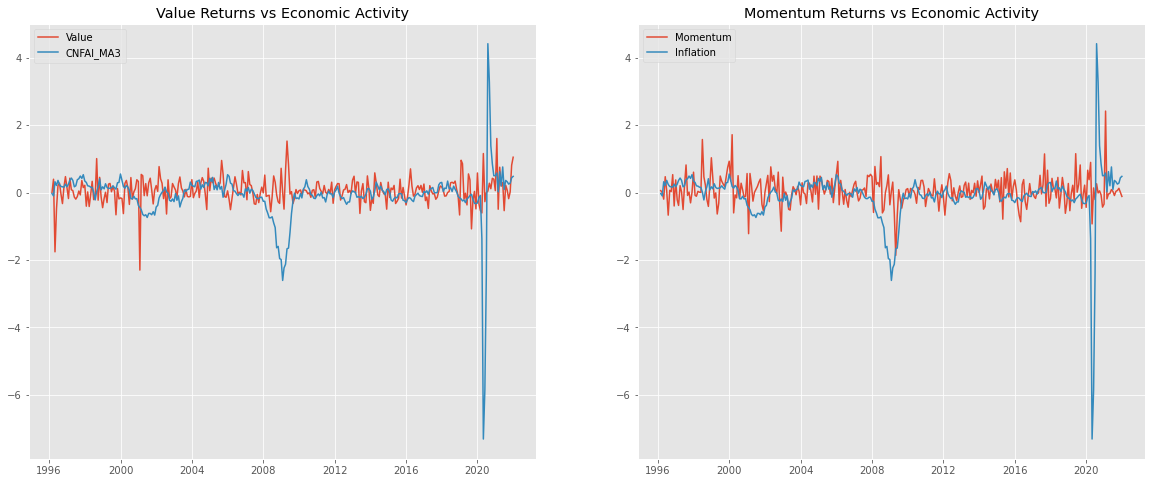

In [137]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))

ax1.plot(factor_ret_df.loc[start_date:end_date, 'Value'] * 12, label = 'Value')
ax1.plot(timing_var_df.loc[start_date:end_date, 'CNFAI_MA3'], label = 'CNFAI_MA3')
ax1.set_title('Value Returns vs Economic Activity')
ax1.legend()

ax2.plot(factor_ret_df.loc[start_date:end_date, 'Momentum'] * 12, label = 'Momentum')
# ax21 = ax2.twinx()
ax2.plot(timing_var_df.loc[start_date:end_date, 'CNFAI_MA3'],  label = 'Inflation')
ax2.set_title('Momentum Returns vs Economic Activity')
ax2.legend()

plt.show

<AxesSubplot:>

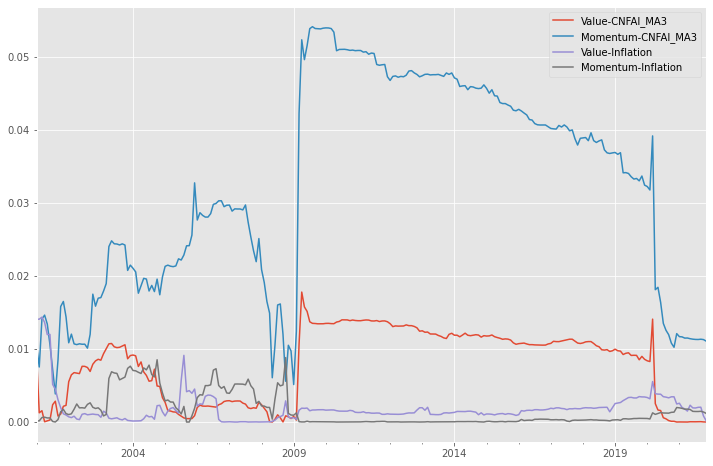

In [138]:
# r^2 of univariate regression - expanding window
timevar_list = ['CNFAI_MA3', 'Inflation']
factor_list = ['Value', 'Momentum']
expanding_window = pd.date_range(test_start_date0, test_end_date0, freq = 'M')

r2_table = pd.DataFrame(index = expanding_window)

for last_date in expanding_window: 
    for timevar in timevar_list: 
        for factor in factor_list: 
            r2, beta0, beta1 = run_ols(timevar, factor , train_start_date0, last_date)
            r2_table.loc[last_date, factor + '-' + timevar] = r2
    
r2_table.plot(figsize = (12,8))

Whats with the spike in 2009 and the drop in 2020... I wonder if its the same for the AQR/Fama-French factors... Also, does rolling-window perform better? 

In [ ]:
# r^2 of univariate regression - rolling window
timevar_list = ['CNFAI_MA3', 'Inflation']
factor_list = ['Value', 'Momentum']
expanding_window = pd.date_range(test_start_date0, test_end_date0, freq = 'M')

r2_table = pd.DataFrame(index = expanding_window)

for last_date in expanding_window: 
    for timevar in timevar_list: 
        for factor in factor_list: 
            r2, beta0, beta1 = run_ols(timevar, factor , train_start_date0, last_date)
            r2_table.loc[last_date, factor + '-' + timevar] = r2
    
r2_table.plot(figsize = (12,8))

<a id = 'results'> </a>
<h3> Results  

<h4> <font color = 'darkblue'> Static Window </font> </h4>

In this section, we seek to test the estimation of `gamma` using a static window approach. That is, we use a <u> fixed training period </u> to estimate the parameters, and use that to forecast future factor returns in the <u> testing period </u>. 

In [227]:
# compute gamma
mom_inflation = calc_gamma('Momentum', factor_ret_df, 'Inflation', timing_var_df)
mom_GDP = calc_gamma('Momentum', factor_ret_df, 'CNFAI_MA3', timing_var_df)
val_inflation = calc_gamma('Value', factor_ret_df, 'Inflation', timing_var_df)
val_GDP = calc_gamma('Value', factor_ret_df, 'CNFAI_MA3', timing_var_df)

# target portfolio returns
factor_returns_test = factor_ret_df.loc[test_start_date:test_end_date].copy()

factor_returns_test['ValMom-Max'] = factor_returns_test.max(axis = 1)
factor_returns_test['ValMom-50-50'] = 0.5 * (factor_returns_test['Value'] + factor_returns_test['Momentum']) # naive benchmark
factor_returns_test['ValMom-60-40'] = 0.6 * factor_returns_test['Value'] + 0.4 * factor_returns_test['Momentum'] # static 60-40 
factor_returns_test['ValMom-40-60'] = 0.4 * factor_returns_test['Value'] + 0.6 * factor_returns_test['Momentum'] # static 40-60

factor_returns_test['ValMom-gamma1']  = factor_returns_test['Value'] * (1 - mom_inflation['Gamma']) + factor_returns_test['Momentum'] * (mom_inflation['Gamma'])
factor_returns_test['ValMom-gamma2']  = factor_returns_test['Value'] * (1 - mom_GDP['Gamma']) + factor_returns_test['Momentum'] * (mom_GDP['Gamma'])
factor_returns_test['ValMom-gamma3']  = factor_returns_test['Value'] * (val_inflation['Gamma']) + factor_returns_test['Momentum'] * (1 - val_inflation['Gamma'])
factor_returns_test['ValMom-gamma4']  = factor_returns_test['Value'] * (val_GDP['Gamma']) + factor_returns_test['Momentum'] * (1 - val_GDP['Gamma'])

# target portfolio weights
factor_weights_test = {}
factor_weights_test['Value'] = factor_weights['Value']
factor_weights_test['Momentum'] = factor_weights['Momentum']
factor_weights_test['ValMom-Max'] = factor_weights['Value']
factor_weights_test['ValMom-50-50'] = 0.5 * (factor_weights['Value'] + factor_weights['Momentum']) 
factor_weights_test['ValMom-60-40'] = 0.6 * factor_weights['Value'] + 0.4 * factor_weights['Momentum']
factor_weights_test['ValMom-40-60'] = 0.4 * factor_weights['Value'] + 0.6 * factor_weights['Momentum'] 

gamma1 = (mom_inflation['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma1'] = factor_weights['Value'].loc[expanding_window].mul(1 - gamma1, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(gamma1, axis = 0)

gamma2 = (mom_GDP['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma2'] = factor_weights['Value'].loc[expanding_window].mul(1 - gamma2, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(gamma2, axis = 0)

gamma3 = (val_inflation['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma3'] = factor_weights['Value'].loc[expanding_window].mul(gamma3, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(1 - gamma3, axis = 0)

gamma4 = (val_GDP['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma4'] = factor_weights['Value'].loc[expanding_window].mul(gamma4, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(1- gamma4, axis = 0)

# compute performance measures
summary_table(factor_weights_test, factor_returns_test, test_start_date, test_end_date)

C:\Users\tyyew\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Value,Momentum,ValMom-Max,ValMom-50-50,ValMom-60-40,ValMom-40-60,ValMom-gamma1,ValMom-gamma2,ValMom-gamma3,ValMom-gamma4
Return,0.0861005,0.0451986,0.290191,0.0656496,0.0697397,0.0615594,0.0624641,0.0741946,0.0834753,0.0593564
Volatility,0.350816,0.408671,0.311313,0.229582,0.228051,0.246567,0.231792,0.283095,0.290972,0.248931
SharpeRatio,0.245429,0.110599,0.932153,0.285952,0.305808,0.249666,0.269484,0.262084,0.286884,0.238445
Mean Drawdown,-0.0975484,-0.0834071,-0.0842739,-0.0529608,-0.0542488,-0.0516728,-0.0536955,-0.055831,-0.093807,-0.0709921
Max Drawdown,-0.217258,-0.244382,-0.217461,-0.196271,-0.192033,-0.200509,-0.194261,-0.195472,-0.213719,-0.198578
Turnover,4.76971,9.38214,4.76971,5.92584,5.44321,6.48132,5.81117,9.26637,10.5249,8.05656
Leverage,1.28023,1.56703,1.28023,1.02462,1.00247,1.0783,1.01328,1.082,1.13299,1.04071


In [174]:
corr_ = factor_returns_test.corr()
corr_.style.background_gradient(cmap='coolwarm').set_precision(2)

,Value,Momentum,ValMom-50-50,ValMom-60-40,ValMom-40-60,ValMom-gamma1,ValMom-gamma2,ValMom-gamma3,ValMom-gamma4
Value,1.00,-0.28,0.52,0.72,0.29,0.50,0.41,0.49,0.56
Momentum,-0.28,1.00,0.68,0.46,0.84,0.67,0.64,0.61,0.49
ValMom-50-50,0.52,0.68,1.00,0.96,0.97,0.98,0.89,0.92,0.86
ValMom-60-40,0.72,0.46,0.96,1.00,0.87,0.94,0.84,0.89,0.86
ValMom-40-60,0.29,0.84,0.97,0.87,1.00,0.95,0.87,0.89,0.80
ValMom-gamma1,0.50,0.67,0.98,0.94,0.95,1.00,0.88,0.91,0.85
ValMom-gamma2,0.41,0.64,0.89,0.84,0.87,0.88,1.00,0.82,0.77
ValMom-gamma3,0.49,0.61,0.92,0.89,0.89,0.91,0.82,1.00,0.89
ValMom-gamma4,0.56,0.49,0.86,0.86,0.80,0.85,0.77,0.89,1.00


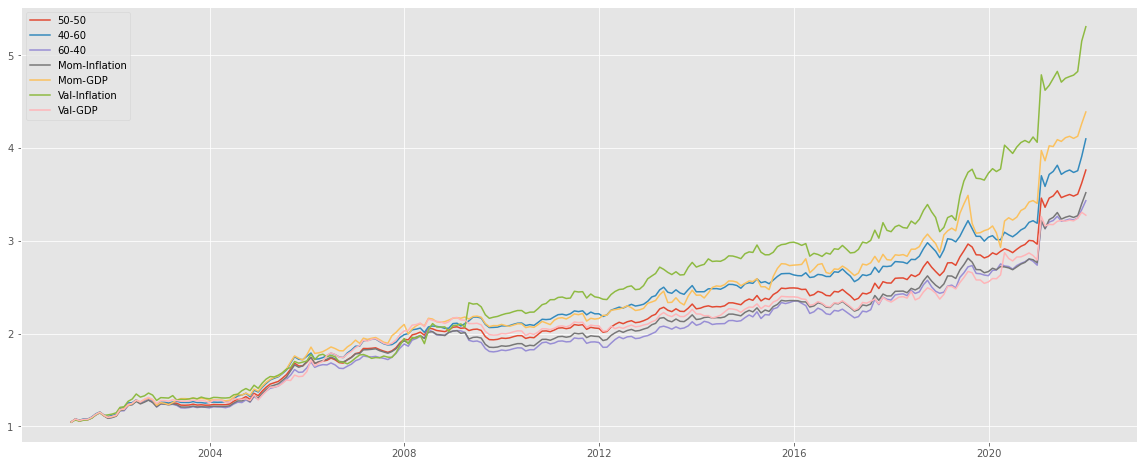

In [134]:
# cumulative returns
factor_cumret = np.cumprod(1 + factor_returns_test)

plt.figure(figsize = (20,8))
plt.plot(factor_cumret['ValMom-50-50'], label = '50-50')
plt.plot(factor_cumret['ValMom-60-40'], label = '40-60')
plt.plot(factor_cumret['ValMom-40-60'], label = '60-40')
plt.plot(factor_cumret['ValMom-gamma1'], label = 'Mom-Inflation')
plt.plot(factor_cumret['ValMom-gamma2'], label = 'Mom-GDP')
plt.plot(factor_cumret['ValMom-gamma3'], label = 'Val-Inflation')
plt.plot(factor_cumret['ValMom-gamma4'], label = 'Val-GDP')
plt.legend()

<h4> <font color = 'darkblue'> Expanding Window </font> </h4>

In this section, we seek to test the estimation of `gamma` using an expanding window approach.

In [221]:
# compute gamma
mom_inflation_ew = calc_gamma_ew('Momentum', factor_ret_df, 'Inflation', timing_var_df)
mom_GDP_ew = calc_gamma_ew('Momentum', factor_ret_df, 'CNFAI_MA3', timing_var_df)
val_inflation_ew = calc_gamma_ew('Value', factor_ret_df, 'Inflation', timing_var_df)
val_GDP_ew = calc_gamma_ew('Value', factor_ret_df, 'CNFAI_MA3', timing_var_df)

# target portfolio returns
factor_returns_test = factor_ret_df.loc[test_start_date:test_end_date].copy()

factor_returns_test['ValMom-50-50'] = 0.5 * (factor_returns_test['Value'] + factor_returns_test['Momentum']) # naive benchmark
factor_returns_test['ValMom-60-40'] = 0.6 * factor_returns_test['Value'] + 0.4 * factor_returns_test['Momentum'] # static 60-40 
factor_returns_test['ValMom-40-60'] = 0.4 * factor_returns_test['Value'] + 0.6 * factor_returns_test['Momentum'] # static 40-60

factor_returns_test['ValMom-gamma1']  = factor_returns_test['Value'] * (1 - mom_inflation_ew['Gamma']) + factor_returns_test['Momentum'] * (mom_inflation_ew['Gamma'])
factor_returns_test['ValMom-gamma2']  = factor_returns_test['Value'] * (1 - mom_GDP_ew['Gamma']) + factor_returns_test['Momentum'] * (mom_GDP_ew['Gamma'])
factor_returns_test['ValMom-gamma3']  = factor_returns_test['Value'] * (val_inflation_ew['Gamma']) + factor_returns_test['Momentum'] * (1 - val_inflation_ew['Gamma'])
factor_returns_test['ValMom-gamma4']  = factor_returns_test['Value'] * (val_GDP_ew['Gamma']) + factor_returns_test['Momentum'] * (1 - val_GDP_ew['Gamma'])

# target portfolio weights
factor_weights_test = {}
factor_weights_test['Value'] = factor_weights['Value']
factor_weights_test['Momentum'] = factor_weights['Momentum']
factor_weights_test['ValMom-50-50'] = 0.5 * (factor_weights['Value'] + factor_weights['Momentum']) 
factor_weights_test['ValMom-60-40'] = 0.6 * factor_weights['Value'] + 0.4 * factor_weights['Momentum']
factor_weights_test['ValMom-40-60'] = 0.4 * factor_weights['Value'] + 0.6 * factor_weights['Momentum'] 

gamma1 = (mom_inflation_ew['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma1'] = factor_weights['Value'].loc[expanding_window].mul(1 - gamma1, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(gamma1, axis = 0)

gamma2 = (mom_GDP_ew['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma2'] = factor_weights['Value'].loc[expanding_window].mul(1 - gamma2, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(gamma2, axis = 0)

gamma3 = (val_inflation_ew['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma3'] = factor_weights['Value'].loc[expanding_window].mul(gamma3, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(1 - gamma3, axis = 0)

gamma4 = (val_GDP_ew['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gamma4'] = factor_weights['Value'].loc[expanding_window].mul(gamma4, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(1- gamma4, axis = 0)


# compute performance measures
summary_table(factor_weights_test, factor_returns_test, test_start_date, test_end_date)

,Value,Momentum,ValMom-50-50,ValMom-60-40,ValMom-40-60,ValMom-gamma1,ValMom-gamma2,ValMom-gamma3,ValMom-gamma4
2001-02-28,0.044791,0.047163,0.045977,0.045740,0.046214,0.045977,0.045977,0.045977,0.045977
2001-03-31,0.041525,0.017735,0.029630,0.032009,0.027251,0.030132,0.035973,0.022959,0.026508
2001-04-30,-0.007707,-0.021373,-0.014540,-0.013173,-0.015906,-0.014047,-0.007707,-0.008688,-0.014040
2001-05-31,0.022085,0.000389,0.011237,0.013407,0.009067,0.010904,0.011516,0.008389,0.007982
2001-06-30,-0.008163,0.007823,-0.000170,-0.001768,0.001429,0.000640,-0.001865,0.006834,-0.001127
...,...,...,...,...,...,...,...,...,...
2021-08-31,0.005977,0.002952,0.004464,0.004767,0.004162,0.004653,0.004297,0.005536,0.004455
2021-09-30,-0.015206,0.005110,-0.005048,-0.007080,-0.003017,-0.005523,-0.005192,-0.005832,-0.004967
2021-10-31,0.001585,0.010396,0.005991,0.005109,0.006872,0.006145,0.005887,0.006220,0.005986
2021-11-30,0.067740,0.000587,0.034163,0.040879,0.027448,0.028516,0.033854,0.030027,0.035070


Expanding window gives slightly better results, which is not surprising since we are improving our factor return estimates. Also, expanding window estimation produces portfolios with lower turnover, further increasing the returns of our target portfolio net trading costs.

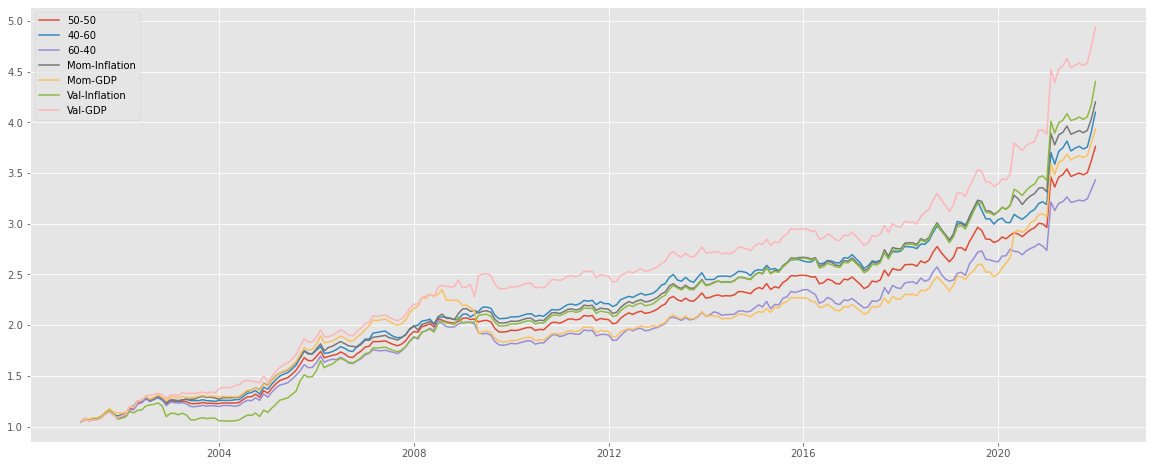

In [223]:
# cumulative returns
factor_cumret = np.cumprod(1 + factor_returns_test)

plt.figure(figsize = (20,8))
plt.plot(factor_cumret['ValMom-50-50'], label = '50-50')
plt.plot(factor_cumret['ValMom-60-40'], label = '40-60')
plt.plot(factor_cumret['ValMom-40-60'], label = '60-40')
plt.plot(factor_cumret['ValMom-gamma1'], label = 'Mom-Inflation')
plt.plot(factor_cumret['ValMom-gamma2'], label = 'Mom-GDP')
plt.plot(factor_cumret['ValMom-gamma3'], label = 'Val-Inflation')
plt.plot(factor_cumret['ValMom-gamma4'], label = 'Val-GDP')
plt.legend()

<h4> <font color = 'darkblue'> Combining Timing Variables </font> </h4>

From the analysis above, we see that `CNFAI_MA3` is a more suitable timing variable for value, and `Inflation` is a more suitable timing variable for momentum. We want to see if we can use both timing variables to forecast the expected returns of value and momentum, and set factor loading `gamma` to maximize portfolio returns. 

The ability to derive accurate 1-period ahead forecasts of factor returns is undeniably powerful. As seen from the `ValMom-prophet` column below, if we have the prescience of knowing exactly whether value or momentum will perform better in the next period, and tilt our factor loadings accordingly, we can achieve a SR of 0.93, more than 3 times of a 50-50 static split. While such a discussion seems frivolous in the ex-ante context, it does illustrate the rewards of factor timing if nothing else. 

In [243]:
# compute gamma 
gamma_gdp_inflation = calc_gamma_binary(factor_ret_df, timing_var_df, 'CNFAI_MA3', 'Inflation', upper_bound = 0.6) 
gamma_prophet = factor_ret_df.copy()
gamma_prophet['Gamma'] = np.where(factor_ret_df['Value']>factor_ret_df['Momentum'], 1, 0)

# target portfolio returns
factor_returns_test = factor_ret_df.loc[test_start_date:test_end_date].copy()

factor_returns_test['ValMom-50-50'] = 0.5 * (factor_returns_test['Value'] + factor_returns_test['Momentum']) # naive benchmark
factor_returns_test['ValMom-60-40'] = 0.6 * factor_returns_test['Value'] + 0.4 * factor_returns_test['Momentum'] # static 60-40 
factor_returns_test['ValMom-40-60'] = 0.4 * factor_returns_test['Value'] + 0.6 * factor_returns_test['Momentum'] # static 40-60
factor_returns_test['ValMom-gdp-inf']  = factor_returns_test['Value'] * (gamma_gdp_inflation['Gamma']) + factor_returns_test['Momentum'] * (1 - gamma_gdp_inflation['Gamma'])
factor_returns_test['ValMom-prophet']  = factor_returns_test['Value'] * (gamma_prophet['Gamma']) + factor_returns_test['Momentum'] * (1 - gamma_prophet['Gamma'])

# target portfolio weights
factor_weights_test = {}
factor_weights_test['Value'] = factor_weights['Value']
factor_weights_test['Momentum'] = factor_weights['Momentum']
factor_weights_test['ValMom-50-50'] = 0.5 * (factor_weights['Value'] + factor_weights['Momentum']) 
factor_weights_test['ValMom-60-40'] = 0.6 * factor_weights['Value'] + 0.4 * factor_weights['Momentum']
factor_weights_test['ValMom-40-60'] = 0.4 * factor_weights['Value'] + 0.6 * factor_weights['Momentum'] 
gamma1 = (gamma_gdp_inflation['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-gdp-inf'] = factor_weights['Value'].loc[expanding_window].mul(gamma1, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(1 - gamma1, axis = 0)
gamma2 = (gamma_prophet['Gamma']).shift(-1, freq = 'infer')
factor_weights_test['ValMom-prophet'] = factor_weights['Value'].loc[expanding_window].mul(gamma2, axis = 0) + factor_weights['Momentum'].loc[expanding_window].mul(1 - gamma2, axis = 0)

# compute performance measures
summary_table(factor_weights_test, factor_returns_test, test_start_date, test_end_date)

,Value,Momentum,ValMom-50-50,ValMom-60-40,ValMom-40-60,ValMom-gdp-inf,ValMom-prophet
Return,0.0861005,0.0451986,0.0656496,0.0697397,0.0615594,0.0718165,0.290191
Volatility,0.350816,0.408671,0.229582,0.228051,0.246567,0.240062,0.311313
SharpeRatio,0.245429,0.110599,0.285952,0.305808,0.249666,0.299158,0.932153
Mean Drawdown,-0.0975484,-0.0834071,-0.0529608,-0.0542488,-0.0516728,-0.0508181,-0.0842739
Max Drawdown,-0.217258,-0.244382,-0.196271,-0.192033,-0.200509,-0.200509,-0.217461
Turnover,4.76971,9.38214,5.92584,5.44321,6.48132,6.26551,13.3777
Leverage,1.28023,1.56703,1.02462,1.00247,1.0783,1.03582,1.13829


<h4> <font color = 'darkblue'> Rolling Window </font> </h4>

In [185]:
mom_inflation_ew

,Forecasted Returns,Actual Returns,Signal,Gamma
2001-02-28,0.0116055,0.047163,0.000000,0.500000
2001-03-31,0.0106259,0.017735,-0.084407,0.478911
2001-04-30,0.00909079,-0.021373,-0.144470,0.463945
2001-05-31,0.00964836,0.000389,0.061334,0.515329
2001-06-30,0.0116103,0.007823,0.203340,0.550660
...,...,...,...,...
2021-08-31,0.00629243,0.002952,-0.250890,0.437605
2021-09-30,0.00570345,0.005110,-0.093601,0.476617
2021-10-31,0.00610376,0.010396,0.070187,0.517540
2021-11-30,0.00817681,0.000587,0.339633,0.584101


In [ ]:
# compute gamma
mom_inflation_ew = calc_gamma_ew('Momentum', factor_ret_df, 'Inflation', timing_var_df)
mom_GDP_ew = calc_gamma_ew('Momentum', factor_ret_df, 'CNFAI_MA3_pct', timing_var_df)
val_inflation_ew = calc_gamma_ew('Value', factor_ret_df, 'Inflation', timing_var_df)
val_GDP_ew = calc_gamma_ew('Value', factor_ret_df, 'CNFAI_MA3_pct', timing_var_df)

# target portfolio returns
factor_returns_test = factor_returns.loc[test_start_date:test_end_date].copy()
factor_returns_test['ValMom-50-50'] = 0.5 * (factor_returns_test['Value'] + factor_returns_test['Momentum'])
factor_returns_test['ValMom-60-40'] = 0.6 * factor_returns_test['Value'] + 0.4 * factor_returns_test['Momentum']
factor_returns_test['ValMom-40-60'] = 0.4 * factor_returns_test['Value'] + 0.6 * factor_returns_test['Momentum']
factor_returns_test['ValMom-gamma1']  = factor_returns_test['Value'] * (1 - mom_inflation_ew['Gamma']) + factor_returns_test['Momentum'] * (mom_inflation_ew['Gamma'])
factor_returns_test['ValMom-gamma2']  = factor_returns_test['Value'] * (1 - mom_GDP_ew['Gamma']) + factor_returns_test['Momentum'] * (mom_GDP_ew['Gamma'])
factor_returns_test['ValMom-gamma3']  = factor_returns_test['Value'] * (val_inflation_ew['Gamma']) + factor_returns_test['Momentum'] * (1 - val_inflation_ew['Gamma'])
factor_returns_test['ValMom-gamma4']  = factor_returns_test['Value'] * (val_GDP_ew['Gamma']) + factor_returns_test['Momentum'] * (1 - val_GDP_ew['Gamma'])

factor_returns_test

<h2> 4. Appendix

<h3> A. Timing Variables on AQR Factors </h3> 

We tested our timing variables on the value and momentum factor returns given in [Ilmanen (2019)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3400998) to see if the sensitivies vary depending on factor construction. 

In [ ]:
path3 = r"C:\Users\tyyew\Desktop\Quant\Columbia MAFN\Study Materials\Sem 3\Quantitative Methods in Investment Management\Project\Timing Variables.xlsx"
timing_variables = pd.read_excel(path3,sheet_name = "Timing Variables", index_col = 0).fillna(0)
factor_returns1 = pd.read_excel(path3,sheet_name = "Factor Returns", index_col = 0, usecols = ['Date', 'Value', "Momentum"])

In [ ]:
# whole period
start_date0 = pd.Timestamp('1989-12-31')
start_date = start_date0 + DateOffset(months=1)
end_date0 = pd.Timestamp('2022-01-31')
end_date = end_date0 + DateOffset(months=1)
# training period
train_start_date0 = pd.Timestamp('1989-12-31')
train_start_date = train_start_date0 + DateOffset(months=1)
train_end_date0 = pd.Timestamp('1999-12-31')
train_end_date = train_end_date0 + DateOffset(months=1)
# testing period
test_start_date0 = pd.Timestamp('2000-01-31')
test_start_date = test_start_date0 + DateOffset(months=1)
test_end_date0 = pd.Timestamp('2022-01-31')
test_end_date = test_end_date0 + DateOffset(months=1)

In [ ]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))

ax1.plot(factor_returns.loc[start_date:end_date, 'Value'] * 12, label = 'Value')
ax1.plot(timing_variables.loc[start_date:end_date, 'CNFAI_MA3'], label = 'CNFAI_MA3')
ax1.set_title('Value Returns vs Economic Activity')
ax1.legend()

ax2.plot(factor_returns.loc[start_date:end_date, 'Momentum'] * 12, label = 'Momentum')
# ax21 = ax2.twinx()
ax2.plot(timing_variables.loc[start_date:end_date, 'CNFAI_MA3'],  label = 'Inflation')
ax2.set_title('Momentum Returns vs Economic Activity')
ax2.legend()

plt.show

In [ ]:
# compute gamma
mom_inflation = calc_gamma('Momentum', 'Inflation')
mom_GDP = calc_gamma('Momentum', 'CNFAI_MA3')
val_inflation = calc_gamma('Value', 'Inflation')
val_GDP = calc_gamma('Value', 'CNFAI_MA3')

In [ ]:
# populate target portfolio returns
factor_returns_test = factor_returns.loc[test_start_date:test_end_date].copy()
# naive benchmark
factor_returns_test['ValMom-50-50'] = 0.5 * (factor_returns_test['Value'] + factor_returns_test['Momentum'])
# static 60-40 
factor_returns_test['ValMom-60-40'] = 0.6 * factor_returns_test['Value'] + 0.4 * factor_returns_test['Momentum']
# static 40-60
factor_returns_test['ValMom-40-60'] = 0.4 * factor_returns_test['Value'] + 0.6 * factor_returns_test['Momentum']
# dynamic
factor_returns_test['ValMom-gamma1']  = factor_returns_test['Value'] * (1 - mom_inflation['Gamma']) + factor_returns_test['Momentum'] * (mom_inflation['Gamma'])
factor_returns_test['ValMom-gamma2']  = factor_returns_test['Value'] * (1 - mom_GDP['Gamma']) + factor_returns_test['Momentum'] * (mom_GDP['Gamma'])
factor_returns_test['ValMom-gamma3']  = factor_returns_test['Value'] * (val_inflation['Gamma']) + factor_returns_test['Momentum'] * (1 - val_inflation['Gamma'])
factor_returns_test['ValMom-gamma4']  = factor_returns_test['Value'] * (val_GDP['Gamma']) + factor_returns_test['Momentum'] * (1 - val_GDP['Gamma'])

In [ ]:
# compute performance measures
summary_table(factor_returns_test)

In [ ]:
# cumulative returns
factor_cumret = np.cumprod(1 + factor_returns_test)

plt.figure(figsize = (20,8))
plt.plot(factor_cumret['ValMom-50-50'], label = '50-50')
plt.plot(factor_cumret['ValMom-60-40'], label = '40-60')
plt.plot(factor_cumret['ValMom-40-60'], label = '60-40')
plt.plot(factor_cumret['ValMom-gamma1'], label = 'Mom-Inflation')
plt.plot(factor_cumret['ValMom-gamma2'], label = 'Mom-GDP')
plt.plot(factor_cumret['ValMom-gamma3'], label = 'Val-Inflation')
plt.plot(factor_cumret['ValMom-gamma4'], label = 'Val-GDP')
plt.legend()

<h3> B. Gamma </h3>

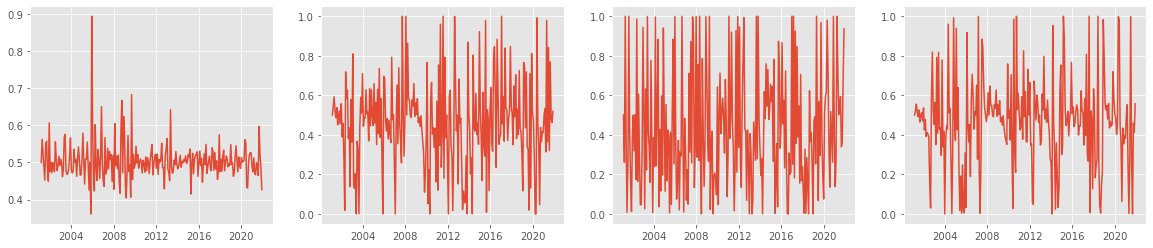

In [569]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,4))

ax1.plot(mom_inflation['Gamma'])
ax2.plot(mom_GDP['Gamma'])
ax3.plot(val_inflation['Gamma'])
ax4.plot(val_GDP['Gamma'])

A natural question here is the correlation between gamma and outperformance against the 50-50 portfolio.

In [570]:
tmp = pd.DataFrame(columns = ['Gamma 1 Return', 'Gamma 1'])
tmp['Gamma 1 Return'] = factor_returns_test['ValMom-gamma1'] - factor_returns_test['ValMom-50-50'] 
tmp['Gamma 1'] = np.abs(mom_inflation['Gamma'].pct_change())
tmp.corr()

,Gamma 1 Return,Gamma 1
Gamma 1 Return,1.000000,0.067526
Gamma 1,0.067526,1.000000


<h3> C. Bounded Gamma </h3>

In [382]:
# 40-60 bound
mom_inflation = calc_gamma('Momentum', 'Inflation', 0.6, 0.4)
mom_GDP = calc_gamma('Momentum', 'CNFAI_MA3', 0.6, 0.4)
val_inflation = calc_gamma('Value', 'Inflation', 0.6, 0.4)
val_GDP = calc_gamma('Value', 'CNFAI_MA3', 0.6, 0.4)

In [386]:
factor_returns_test = factor_returns.loc[test_start_date:test_end_date].copy()
# naive benchmark
factor_returns_test['ValMom-50-50'] = 0.5 * (factor_returns_test['Value'] + factor_returns_test['Momentum'])
# static 60-40 
factor_returns_test['ValMom-60-40'] = 0.6 * factor_returns_test['Value'] + 0.4 * factor_returns_test['Momentum']
# static 40-60
factor_returns_test['ValMom-40-60'] = 0.4 * factor_returns_test['Value'] + 0.6 * factor_returns_test['Momentum']
# dynamic
factor_returns_test['ValMom-gamma1']  = factor_returns_test['Value'] * (1 - mom_inflation['Gamma']) + factor_returns_test['Momentum'] * (mom_inflation['Gamma'])
factor_returns_test['ValMom-gamma2']  = factor_returns_test['Value'] * (1 - mom_GDP['Gamma']) + factor_returns_test['Momentum'] * (mom_GDP['Gamma'])
factor_returns_test['ValMom-gamma3']  = factor_returns_test['Value'] * (val_inflation['Gamma']) + factor_returns_test['Momentum'] * (1 - val_inflation['Gamma'])
factor_returns_test['ValMom-gamma4']  = factor_returns_test['Value'] * (val_GDP['Gamma']) + factor_returns_test['Momentum'] * (1 - val_GDP['Gamma'])

In [387]:
# compute performance measures
ret_annualized = np.mean(factor_returns_test.loc[start_date:end_date]) * 12
vol_annualized = np.std(factor_returns_test.loc[start_date:end_date]) * 12
sharpe = np.mean(factor_returns_test.loc[start_date:end_date])/ np.std(factor_returns_test.loc[start_date:end_date])
# turnover = 
# drawdown = 
# transaction_cost = 
# information_ratio = 
summary = pd.DataFrame(columns = ['Return', 'Volatility', 'SharpeRatio'])
summary['Return'] = ret_annualized
summary['Volatility'] = vol_annualized
summary['SharpeRatio'] = sharpe
summary.T

,Value,Momentum,ValMom-50-50,ValMom-60-40,ValMom-40-60,ValMom-gamma1,ValMom-gamma2,ValMom-gamma3,ValMom-gamma4
Return,0.038242,0.027217,0.032729,0.033832,0.031627,0.038911,0.036104,0.031151,0.035709
Volatility,0.511266,0.627434,0.213937,0.209312,0.265080,0.215058,0.210584,0.239608,0.212170
SharpeRatio,0.074799,0.043378,0.152986,0.161634,0.119311,0.180931,0.171447,0.130009,0.168303


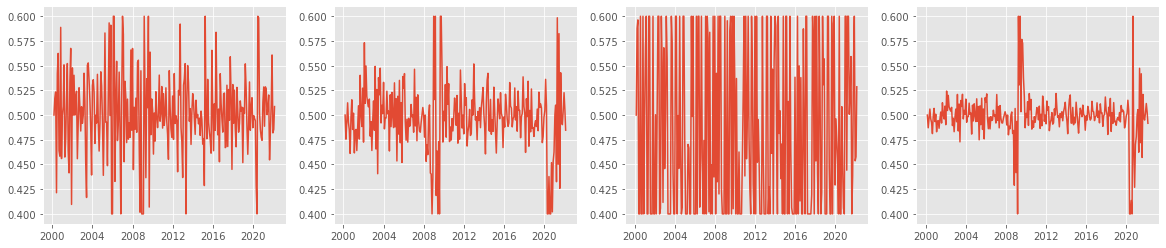

In [388]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,4))

ax1.plot(mom_inflation['Gamma'])
ax2.plot(mom_GDP['Gamma'])
ax3.plot(val_inflation['Gamma'])
ax4.plot(val_GDP['Gamma'])

<h3> D. Time lag in predictor variable </h3>

In [ ]:
diff = 1
plt.scatter(timing_var_df.loc[start_date - pd.offsets.MonthEnd(diff):end_date - pd.offsets.MonthEnd(diff), 'CNFAI_MA3'], factor_ret_df['Value'])